In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [22]:
logs = torch.load('logs_test/sae_logs.pt')
logs_norm = torch.load('logs_test_norm/sae_logs.pt')

/tmp/ipykernel_2233042/3038075003.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  logs = torch.load('logs_test/sae_logs.pt')
/tmp/ipykernel_2233042/3038075003.py:2: Futu

In [8]:
def plotter(logs, log_types, model_prefix):
    num_logs = len(log_types)
    fig, axs = plt.subplots(1, num_logs, figsize=(6 * num_logs, 5), squeeze=False)
    
    for idx, log_type in enumerate(log_types):
        ax = axs[0][idx]
        for model, model_logs in logs.items():
            if not model.startswith(model_prefix):
                continue
            avg_loss = model_logs[log_type]
            epochs = list(range(1, len(avg_loss) + 1))
            ax.plot(epochs, avg_loss, label=model)
        
        ax.set_xlabel("Epoch")
        ax.set_ylabel(log_type)
        ax.set_title(f"{log_type} Across Epochs")
        ax.legend()
        ax.grid(True)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))
    
    plt.tight_layout()
    plt.show()


In [6]:
def plotter(logs, log_type, model_prefix):

    for model, model_logs in logs.items():
        if not model.startswith(model_prefix):
            continue
        avg_loss = model_logs[log_type]
        epochs = list(range(1, len(avg_loss) + 1))
        plt.plot(epochs, avg_loss, label=model)
    
    plt.xlabel("Epoch")
    plt.ylabel(log_type)
    plt.title(f"Training {log_type} Across Epochs for Different Models")
    plt.legend()
    plt.grid(True)
    
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))
    plt.tight_layout()
    plt.show()

## Train Without Standard Norm

### Vanilla SAE Without Reanimation Penalty

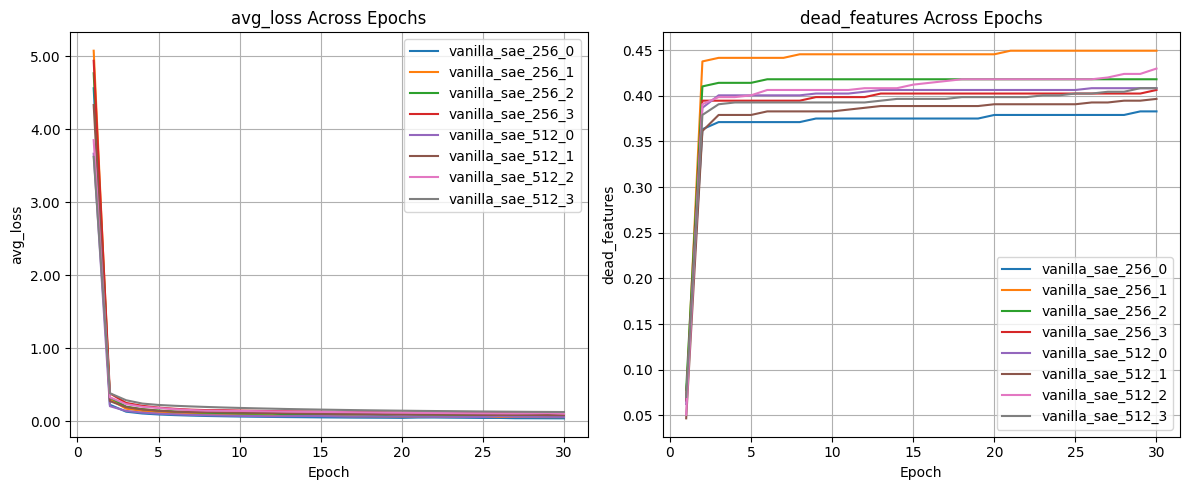

In [15]:
plotter(logs, ['avg_loss', 'dead_features'], 'vanilla_sae')

### Vanilla SAE With Reanim

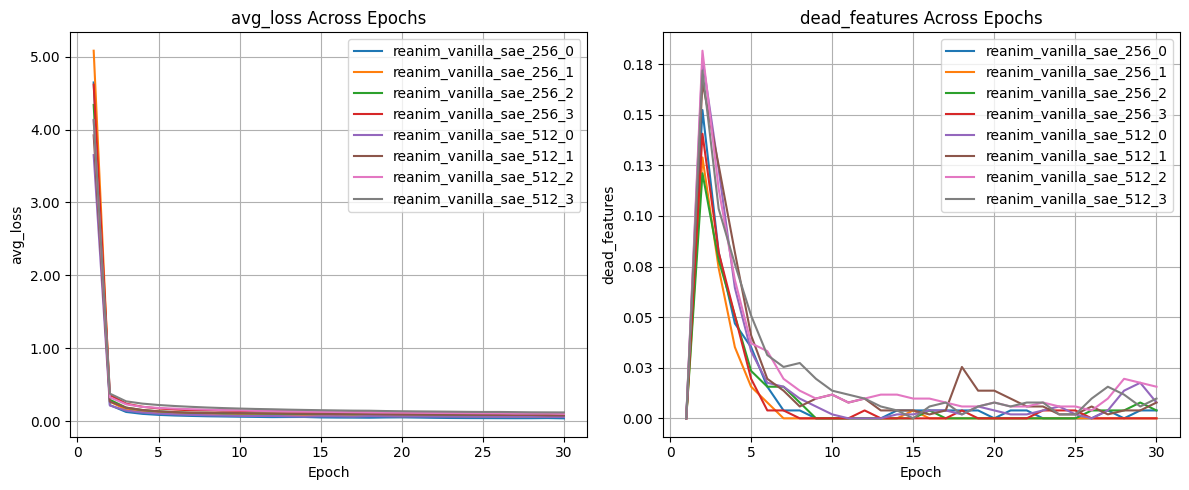

In [16]:
plotter(logs, ['avg_loss', 'dead_features'], 'reanim_vanilla')

### TopK Without Reanim

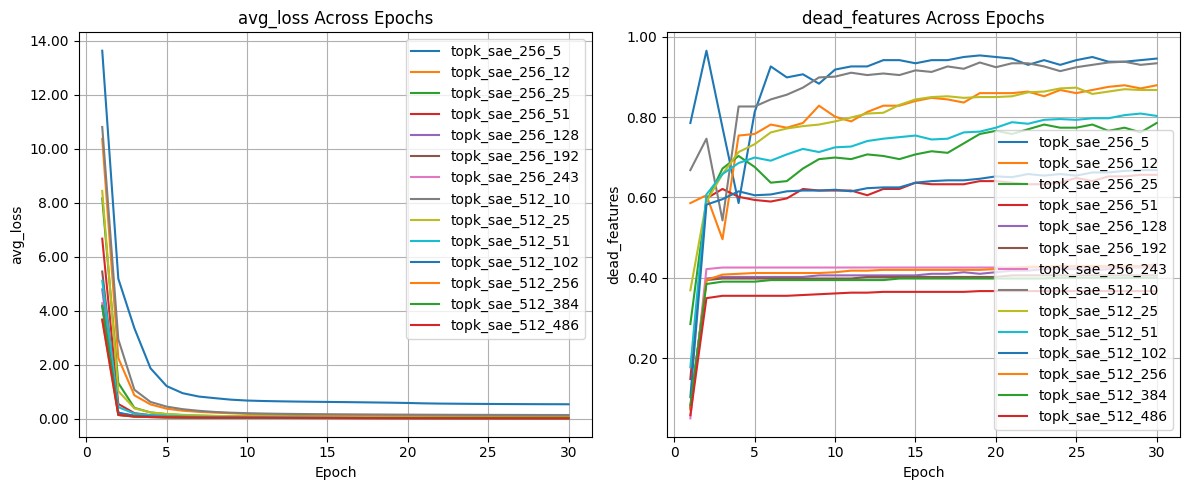

In [17]:
plotter(logs, ['avg_loss', 'dead_features'], 'topk')

### TopK With Reanim

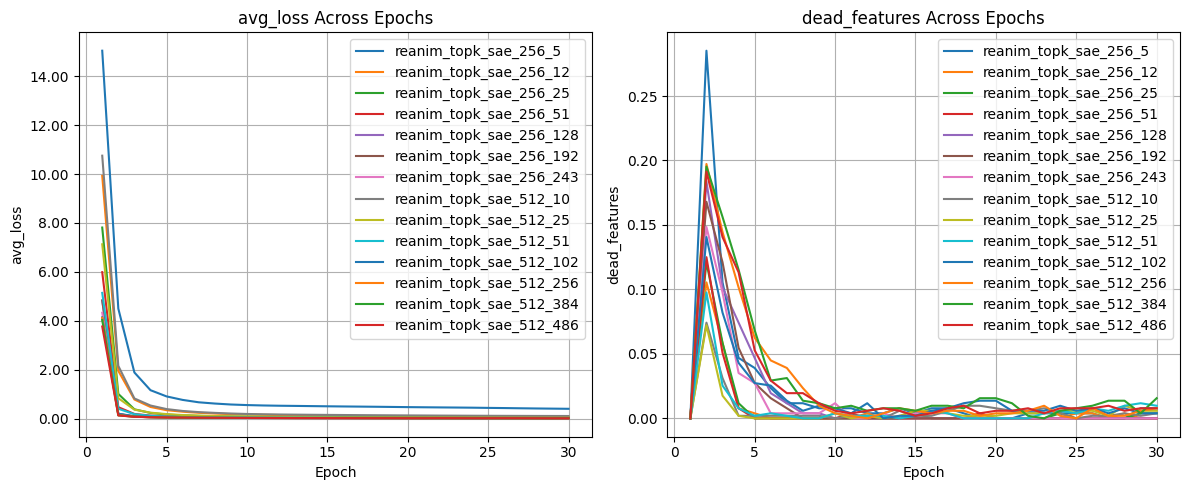

In [18]:
plotter(logs, ['avg_loss', 'dead_features'], 'reanim_topk')

## Norm Based 

### Vanilla SAE Without Reanim

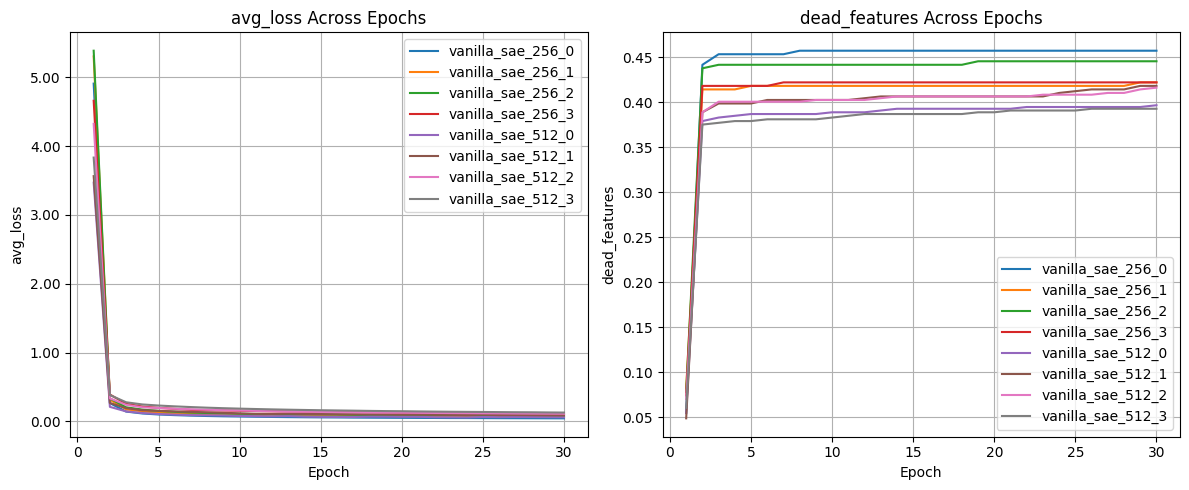

In [25]:
plotter(logs_norm, ['avg_loss', 'dead_features'], 'vanilla_sae')

### Reanim Vanilla SAE

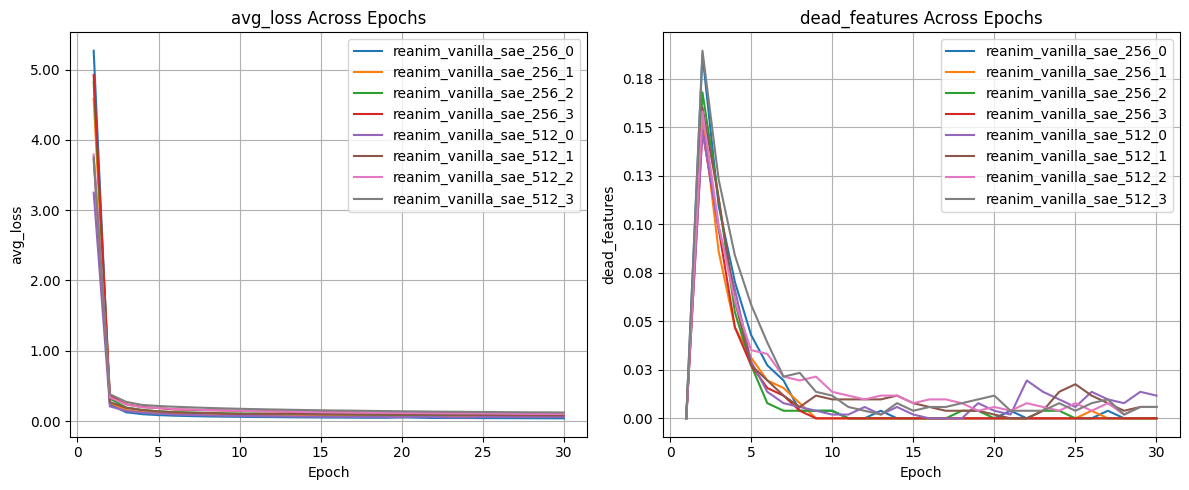

In [27]:
plotter(logs_norm, ['avg_loss', 'dead_features'], 'reanim_vanilla_sae')

## Logistic Regression Classifier 
1. Check if SAE Retains meaningful concepts in their latent space

In [2]:
df = pd.read_csv('sae_lr_results.csv')

In [10]:
df

,Rank,SAE_Name,Test_Accuracy,CV_Mean,CV_Std,Train_Accuracy,N_Features,N_Samples
0,1,reanim_topk_sae_256_192_best_both,0.9892,0.9876,0.0009,0.9952,256,60000
1,2,reanim_topk_sae_256_192_best_loss,0.9892,0.9876,0.0009,0.9952,256,60000
2,3,reanim_vanilla_sae_256_0_best_both,0.9891,0.9880,0.0002,0.9952,256,60000
3,4,vanilla_sae_512_2_best_loss,0.9890,0.9873,0.0005,0.9977,512,60000
4,5,reanim_topk_sae_256_128_best_dead10,0.9890,0.9879,0.0007,0.9955,256,60000
...,...,...,...,...,...,...,...,...
127,128,topk_sae_256_5_best_dead10,0.9035,0.8954,0.0042,0.8966,256,60000
128,129,topk_sae_256_5_best_loss,0.9000,0.9015,0.0026,0.9026,256,60000
129,130,reanim_topk_sae_256_5_best_dead11,0.8654,0.8582,0.0024,0.8595,256,60000
130,131,reanim_topk_sae_256_5_best_both,0.8643,0.8661,0.0013,0.8675,256,60000


In [15]:
df[df.Test_Accuracy < 0.92]

,Rank,SAE_Name,Test_Accuracy,CV_Mean,CV_Std,Train_Accuracy,N_Features,N_Samples
126,127,topk_sae_256_5_best_both,0.9051,0.8985,0.0038,0.8999,256,60000
127,128,topk_sae_256_5_best_dead10,0.9035,0.8954,0.0042,0.8966,256,60000
128,129,topk_sae_256_5_best_loss,0.9000,0.9015,0.0026,0.9026,256,60000
129,130,reanim_topk_sae_256_5_best_dead11,0.8654,0.8582,0.0024,0.8595,256,60000
130,131,reanim_topk_sae_256_5_best_both,0.8643,0.8661,0.0013,0.8675,256,60000
131,132,reanim_topk_sae_256_5_best_loss,0.8629,0.8648,0.0019,0.8657,256,60000


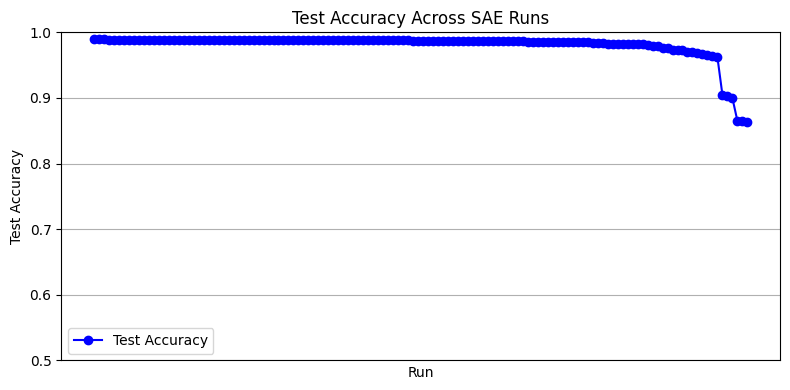

In [14]:

plt.figure(figsize=(8, 4))
plt.plot(df.Test_Accuracy, marker='o', linestyle='-', color='blue', label='Test Accuracy')

plt.ylim(0.5, 1)      
plt.xlabel("Run")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy Across SAE Runs")
plt.xticks([])        
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Baseline SAE, questions, 
1. L1 penalty ranges, cur range, for dict size '256' : [1e-4, 2e-4, 3e-4, 5e-4], and dict size '512' : [1.5e-4, 3e-4, 5e-4, 7e-4]. Should it be bigger, from 0.0001 to 0.1 or 0.3. Can add it to pipeline. 

## Current expt runs from sae logistic regression classifier on z's, 
1. Some SAE's have better Z's compared to others. Min acc: 0.86, Max acc: 0.99 for mnist, so when training SAE need to be aware of sparsity penalty
2. So far, on using single neuron to classify all digits, best during training logs is around 40% which seems to be slightly okay given that if it's random it should be 10%, need to observe once all the logging completes.

## Current Metrics in progress, 
1. Whether a neuron can classifiy all digits, more like a softmax per sae neuron and aggregate best vs avg logistic regression accuracy, across all training variants. 
2. Whether a neuron can classify one digit, binary classification per sae neuron and aggregate best vs avg accuracy
3. Digit Coverage for SAEs given we have neuron level metric, aggregated over SAE to check whether they can recover all vs some?
4. Best digit accuracy across the variants, if a neuron can classify digit 9 with high accuracy what could be the feature it extracted in that neuron?
5. If the digit coverage is high, which training variants are higher, and what hyperparameter combinations leads to these and possibly answer why?
6. Whether increasing the dictionary size results in more redundant concepts?
7. Sparsity vs Accuracy Correlation

In [3]:
vanilla_sae_logs = torch.load('logs_vanilla_sae_07_02/sae_logs.pt')

/tmp/ipykernel_4028541/661120082.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vanilla_sae_logs = torch.load('logs_vanilla_sae_07_02/sae_logs.pt')


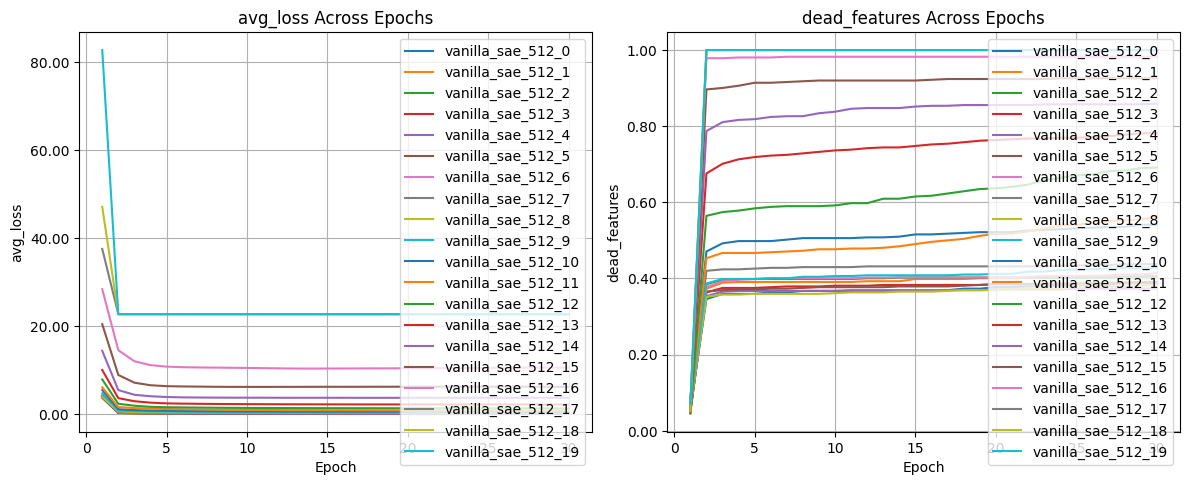

In [9]:
plotter(vanilla_sae_logs, ['avg_loss', 'dead_features'], 'vanilla_sae')